## K-Means clustering

Learn how to create clusters using Scikit-learn and the Nigerian music dataset. We will cover the basics of K-Means for Clustering. There are many ways to work with clusters and the method we use depends on your data. We will try K-Means as it's the most common clustering technique.

K-Means Clustering is a method derived from the domain of signal processing. It is used to divide and partition groups of data into 'k' clusters using a series of observations. Each observation works to group a given datapoint closest to its nearest 'mean', or the center point of a cluster.

The clusters can be visualized as Voronoi diagrams, which include a point (or 'seed') and its corresponding region.


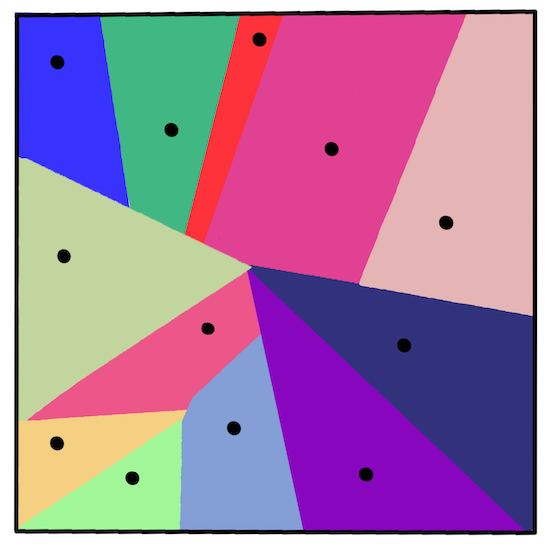


The K-Means clustering process executes in a three-step process:

The algorithm selects k-number of center points by sampling from the dataset. After this, it loops:
1) It assigns each sample to the nearest centroid.
2) It creates new centroids by taking the mean value of all of the samples assigned to the previous centroids.
3) Then, it calculates the difference between the new and old centroids and repeats until the centroids are stabilized.

One drawback of using K-Means includes the fact that you will need to establish 'k', that is the number of centroids. Fortunately the 'elbow method' helps to estimate a good starting value for 'k'.



# Nigerian Music scraped from Spotify - an analysis

In [ ]:
%pip install seaborn

Start where we finished in the last lesson, with data imported and filtered.

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("./nigerian-songs.csv")
df.head()

We will focus only on 3 genres. Maybe we can get 3 clusters built!

In [ ]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [ ]:
df.head()

How clean is this data? Check for outliers using box plots. We will concentrate on columns with fewer outliers (although you could clean out the outliers). Boxplots can show the range of the data and will help choose which columns to use. Note, Boxplots do not show variance, an important element of good clusterable data (https://stats.stackexchange.com/questions/91536/deduce-variance-from-boxplot)

In [ ]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

Choose several columns with similar ranges. Make sure to include the artist_top_genre column to keep our genres straight. 

In [ ]:
# choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# X = scaler.fit_transform(X)

y = le.transform(y)



K-Means Clustering has the drawback of needing to tell it how many clusters to build. We know there are three song types, so let's focus on 3.

In [12]:

from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0],
      dtype=int32)

You see an array printed out with predicted clusters (0, 1,or 2) for each row of the dataframe.

Those numbers don't mean much to us, so let's get a 'silhouette score' to see the accuracy. Our score is in the middle.

In [13]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

# Silhouette score
Look for a silhouette score closer to 1. This score varies from -1 to 1, and if the score is 1, the cluster is dense and well-separated from other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.

Our score is .53, so right in the middle. This indicates that our data is not particularly well-suited to this type of clustering.

Import KMeans and build a model

In [15]:
# range: These are the iterations of the clustering process
# random_state: "Determines random number generation for centroid initialization."
# WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid. Source.
# Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are." Source. The value is appended to the wcss variable on each iteration.
# k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Previously, we surmised that, because you have targeted 3 song genres, you should choose 3 clusters. But is that the case?

Use the wcss variable that you built in the previous step to create a chart showing where the 'bend' in the elbow is, which indicates the optimum number of clusters.

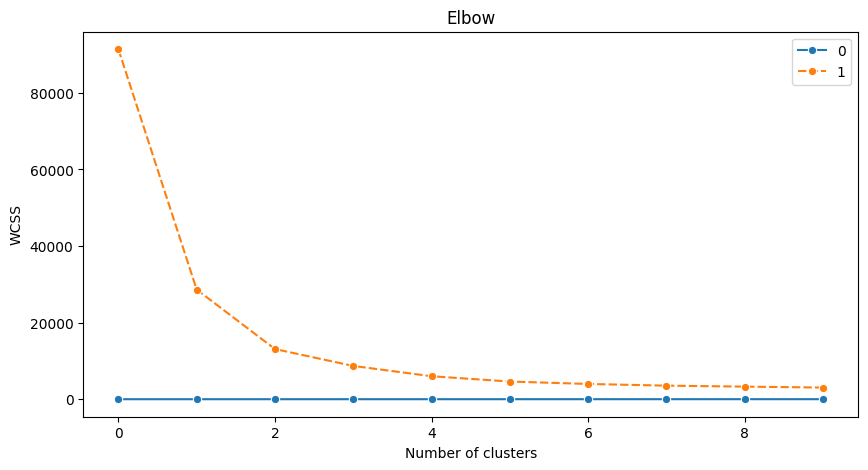

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looks like 3 is a good number after all. Fit the model again and create a scatterplot of your clusters. They do group in bunches, but they are pretty close together.

# Display the clusters
Try the process again, this time setting three clusters, and display the clusters as a scatterplot

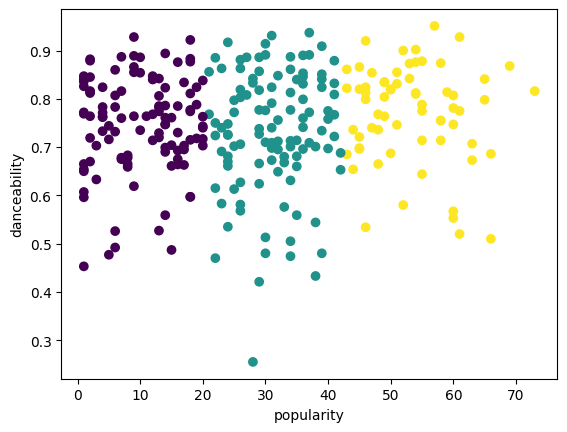

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

This model's accuracy is not bad, but not great. It may be that the data may not lend itself well to K-Means Clustering. You might try a different method.

In [24]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 105 out of 286 samples were correctly labeled.
Accuracy score: 0.37


This data is too imbalanced, too little correlated and there is too much variance between the column values to cluster well. In fact, the clusters that form are probably heavily influenced or skewed by the three genre categories we defined above.

In Scikit-learn's documentation, you can see that a model like this one, with clusters not very well demarcated, has a 'variance' problem

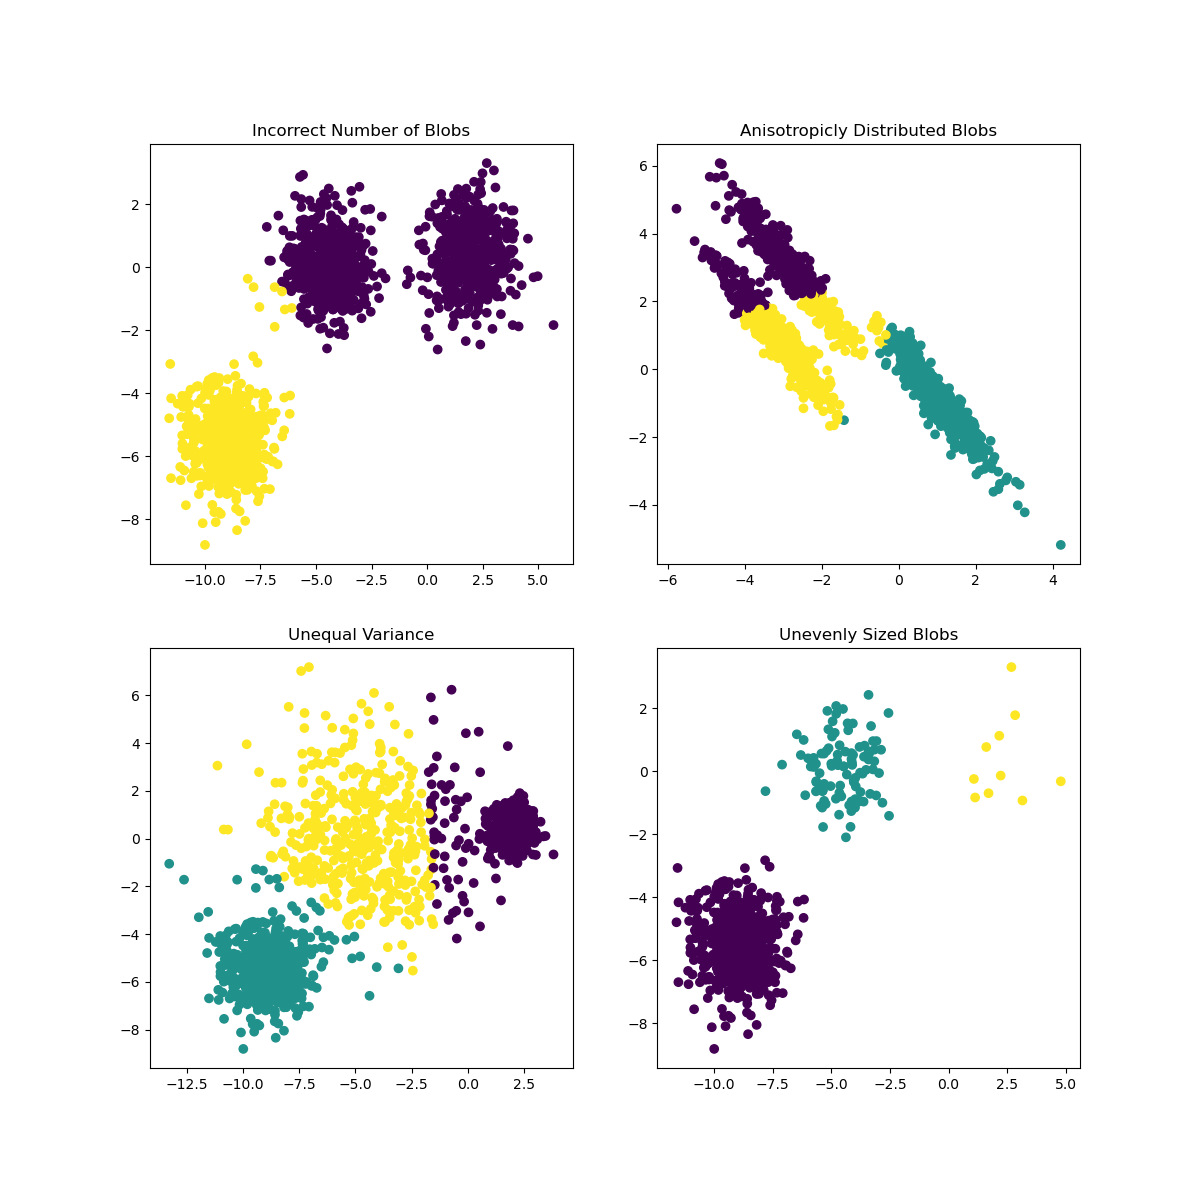

Variance
Variance is defined as "the average of the squared differences from the Mean". In the context of this clustering problem, it refers to data that the numbers of our dataset tend to diverge a bit too much from the mean.